# Интерполационна формула на Лагранж. Теорема за оценка на грешката при интерполация.

#### Задача 1

Да се намери приближено стойността на $\sin \dfrac{\pi}{5}$, като за целта се построи интерпоалционният полином на Лагранж за функцията $\sin(x)$ с възли $x_0=0$, $x_1=\frac{\pi}{6}$, $x_2=\frac{\pi}{3}$, $x_3=\frac{\pi}{2}$. Да се начертаят графиките на двете функции, заедно с точките на интерполация в една коориднатна система. Да се направи оценка на грешката от така направеното приближение и да се сравни с абсолютната грешка.

In [10]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [54]:
#construct the interpoalting polynomial
x_axis = np.array([0, np.pi/6, np.pi/3, np.pi/2])
y_axis = np.sin(x_axis)

def lagrPolynom(x, i, x_axis):
    nom = 1
    denom = 1
    n = len(x_axis)

    for j in range (n):
        if j != i:
            nom = nom * (x - x_axis[j])
            denom = denom * (x_axis[i] - x_axis[j])

    return nom / denom

def l0(x) :
    return lagrPolynom(x, 0, x_axis)
def l1(x) :
    return lagrPolynom(x, 1, x_axis)
def l2(x) :
    return lagrPolynom(x, 2, x_axis)
def l3(x) :
    return lagrPolynom(x, 3, x_axis) 

def L3(x):
    return y_axis[0]*l0(x) + y_axis[1]*l1(x) + y_axis[2]*l2(x) + y_axis[3]*l3(x)



In [56]:
#compute the approximation 
exact_value = np.sin(np.pi/5)
app_value = L3(np.pi/5)
absolute_error = abs(exact_value - app_value)
relative_error = absolute_error / exact_value
error_estimate = 1/24 * abs(np.pi/5 * (np.pi/5 - x_axis[1]) * (np.pi/5 - x_axis[2]) * (np.pi/5 - x_axis[3]))

print(f"Exact Value = {exact_value}")
print(f"Approximated Value = {app_value}")
print(f"Absolute Error = {absolute_error}")
print(f"Relative Error = {relative_error}")
print(f"Error Estimate = {error_estimate}") 


Exact Value = 0.587785252292473
Approximated Value = 0.5870614872174387
Absolute Error = 0.0007237650750343549
Relative Error = 0.001231342692269898
Error Estimate = 0.0010823232337111382


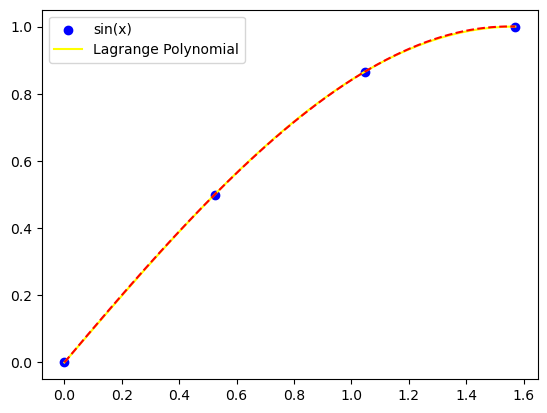

In [58]:
#plot data
x_values = np.linspace(0, np.pi/2, 1000)

# graph bot functions
plt.scatter(x_axis, y_axis, color = "blue")
plt.plot(x_values, np.sin(x_values), color = 'yellow')
plt.plot(x_values, L3(x_values), color = 'red', linestyle = 'dashed')
plt.legend(['sin(x)' , 'Lagrange Polynomial'])
plt.show()

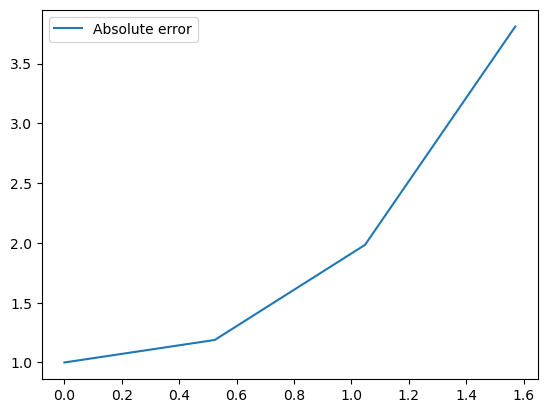

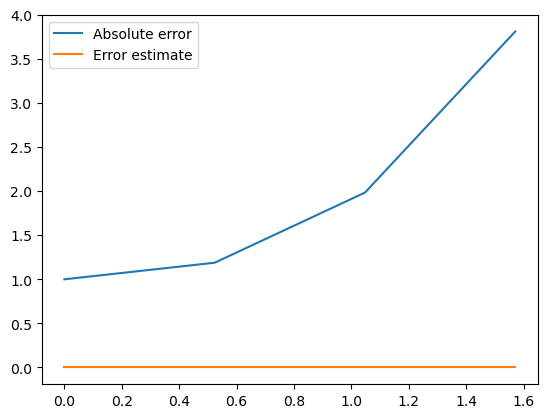

In [74]:
#plot errors as functions of  x
def abs_error_func(x):
    return abs(f(x) - L3(x))

def error_estimate(x):
    return 1/24 * abs(x * (x - math.pi/6) * (x - math.pi/3) * (x - math.pi/2))

plt.plot(x_axis, abs_error_func(x_axis))
plt.legend(['Absolute error'])
plt.show()
plt.plot(x_axis, abs_error_func(x_axis))
plt.plot(x_axis, error_estimate(x_axis))
plt.legend(["Absolute error","Error estimate"])
plt.show()

## Задача 2*

Да се напише функция *lagrange_poly(f, nodes, x)*, която пресмята стойността на интерполационния полином на Лагранж за функцията *f(x)* с възли *nodes* в точка *x*, при произволен избор на различни възли и функция *f(x)*. Параметърът *nodes* да се интерпретира като масив от реални числа, f - име на функция, a *x*- проивзолно реално число.

In [88]:
result = 0

def lagrange_poly(f, nodes, x):
    n = len(nodes)
    res = 0
    for i in range(n):
        term = f(nodes[i])
        for j in range(n):
            if(i != j):
                term *= (x - nodes[j]) / (nodes[i] - nodes[j])
        res += term
    return res
    